In [2]:
import altair as alt
import geopandas as gpd
import gpdvega

In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = world[world.continent == 'Africa']
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


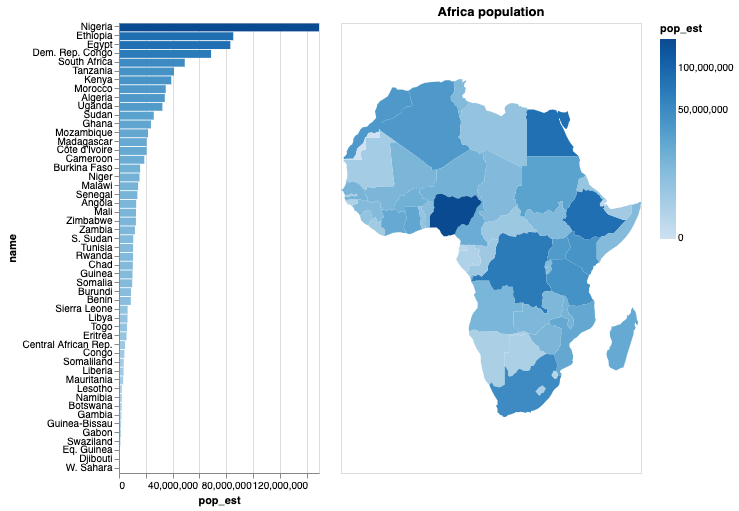

In [3]:
# ORIGINAL CODE FROM https://iliatimofeev.github.io/gpdvega/gallery/map_with_data.html
brush = alt.selection_single(encodings=["y"],on="mouseover", empty='none')
color = alt.Color('pop_est', scale= alt.Scale(type='pow', exponent=0.4))

alt.hconcat(
    alt.Chart().mark_bar().encode(
        x=alt.X('pop_est', scale=alt.Scale(nice=False)),
        y=alt.Y('name', sort=alt.EncodingSortField(field='pop_est',
                                            op='sum', order='descending')),
        tooltip=['name','pop_est','gdp_md_est'],
        color=alt.condition(brush, alt.value('lightgray'), color)
        ).add_selection(
            brush
        ).properties(
            width=200,
            height=450
        ),
    alt.Chart().mark_geoshape().project().encode(
        color=alt.condition(
            brush,
            alt.value('lightgray'),
            color,
        ),
        tooltip=['name','pop_est','gdp_md_est'],
        ).properties(
            width=300,
            height=450,
            title='Africa population'
        ),
    data=world[world.continent == 'Africa']
)

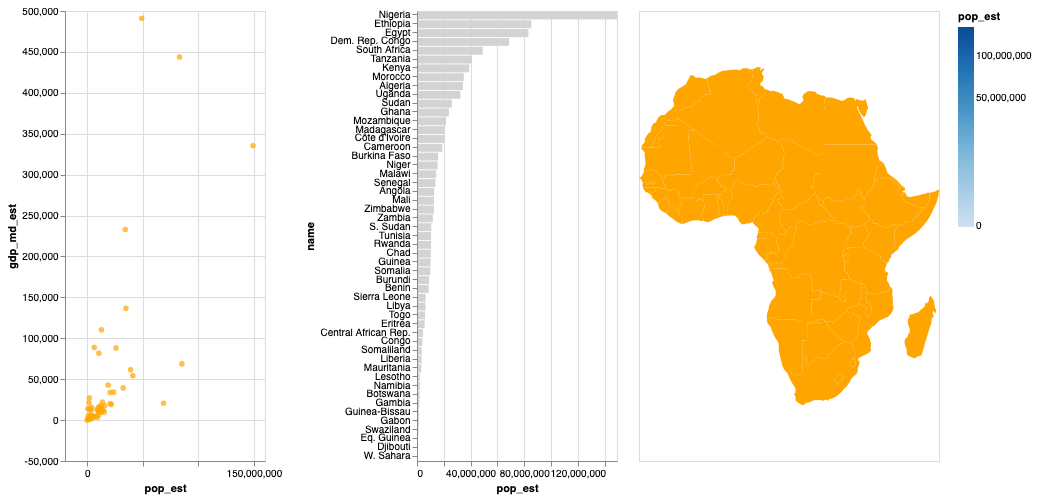

In [26]:
# MY ATTEMPT NUMBER 1 --> kinda wants to work, but isn't really working lol;
# doesn't know how to properly select the polygons it seems
interval = alt.selection_interval()

bar = alt.Chart(data).mark_bar().encode(
    x=alt.X('pop_est', scale=alt.Scale(nice=False)),
    y=alt.Y('name', sort=alt.EncodingSortField(field='pop_est',
                                        op='sum', order='descending')),
    tooltip=['name','pop_est','gdp_md_est'],
    color=alt.condition(interval, alt.value('lightgray'), alt.Color('pop_est', scale= alt.Scale(type='pow', exponent=0.4)))
    ).add_selection(
        interval
    ).properties(
        width=200,
        height=450
)
    
scatter = alt.Chart(data).mark_circle().encode(
    x=alt.X('pop_est'),
    y=alt.Y('gdp_md_est'),
    #tooltip=['name','pop_est','gdp_md_est'],
    color=alt.condition(interval, alt.value('orange'), alt.value('lightgray'))
    ).properties(
        selection=interval,
        width=200,
        height=450
    )
    
bg = alt.Chart(data).mark_geoshape().project().encode(
    color=alt.condition(
        interval,
        alt.value('orange'),
        alt.value('lightray')),
    ).properties(
        width=300,
        height=450,
        #title='Africa population'
    )

scatter | bar | bg

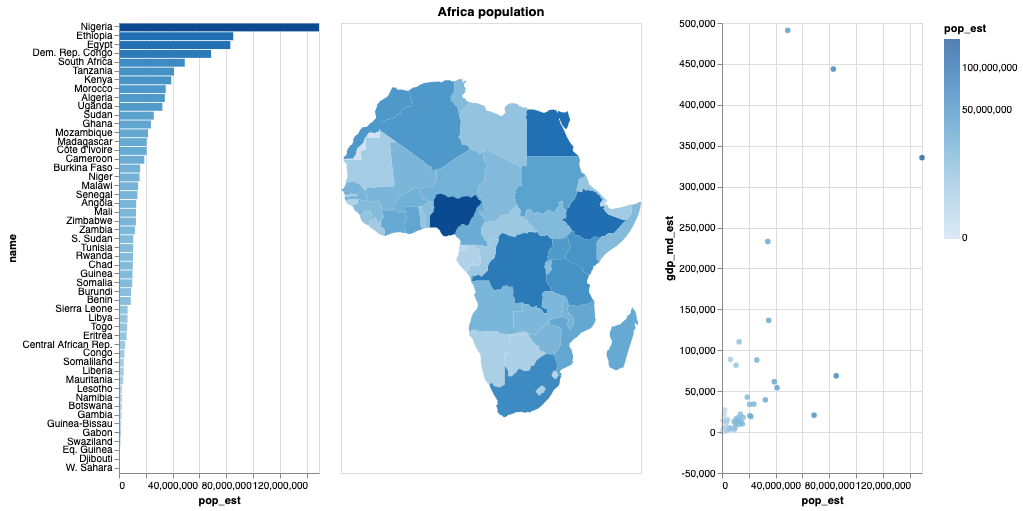

In [28]:
# ATTEMPT NUMBER 2 --> only added a scatterplot w/ selection_single;
# not that useful, but works and is cool

brush = alt.selection_single(encodings=["y"],on="mouseover", empty='none')
color = alt.Color('pop_est', scale= alt.Scale(type='pow', exponent=0.4))

alt.hconcat(
    alt.Chart().mark_bar().encode(
        x=alt.X('pop_est', scale=alt.Scale(nice=False)),
        y=alt.Y('name', sort=alt.EncodingSortField(field='pop_est',
                                            op='sum', order='descending')),
        tooltip=['name','pop_est','gdp_md_est'],
        color=alt.condition(brush, alt.value('lightgray'), color)
        ).add_selection(
            brush
        ).properties(
            width=200,
            height=450
        ),
    alt.Chart().mark_geoshape().project().encode(
        color=alt.condition(
            brush,
            alt.value('lightgray'),
            color,
        ),
        tooltip=['name','pop_est','gdp_md_est'],
        ).properties(
            width=300,
            height=450,
            title='Africa population'
        ),
    alt.Chart().mark_circle().encode(
        x=alt.X('pop_est', scale=alt.Scale(nice=False)),
        y=alt.Y('gdp_md_est', sort=alt.EncodingSortField(field='pop_est',
                                            op='sum', order='descending')),
        tooltip=['name','pop_est','gdp_md_est'],
        color=alt.condition(brush, alt.value('lightgray'), color)
        ).add_selection(
            brush
        ).properties(
            width=200,
            height=450
        ),
    data=world[world.continent == 'Africa']
)